# Algoritmo de Grover

Suponha que temos um espaço amostral não estruturado com
$$N=2^{n} \text{ amostras},$$
com $n\in\mathbb{N}_{+}$. Focaremos nos índices das amostras, mais que nos seus valores. Com isso, vemos que os valores do índice podem ser armazenados usando $n$ qubits.

Com isso, o algoritmo pode ser aplicado para vários tipos de amostras, como localizar um número de telofone em uma lista telefônica ou um número de CPF em um banco de dados e.g. do receita federal.

O __problema__ que queremos resolver é encontrar a solução $x'$, que é a _única_ amostra que possui uma determinada propriedade. Por definição, para
$$x = 0,\cdots, 2^{n}-1$$
temos que tal propriedade é identificada através do valor de uma função
$$f:\{0,1\}^n\rightarrow \{0,1\}$$
tal que
\begin{cases}
f(x) = 1 \text{ se } x \text{ é solução}\ (x=x'), \\
f(x) = 0 \text{ se } x \text{ não é solução}\ (x\ne x').
\end{cases}

Vamos supor que nos é dado uma _caixa preta quântica_ (um oráculo), que calcula essa função e que consegue reconhecer a solução. Assim como no problema de Deutsch, aqui o oráculo é representado pela operador unitário
$$U_f = \sum_{x=0}^{2^n -1}\sum_{y=0}^{2^1 -1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y|,$$
cuja ação na base computacional é
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle,$$
em que $x$ é o índice do registro quântico utilizado para representar os dados (um dos $2^n$ estados da base computacional de $n$ qubits), $|y\rangle$ é o estado inicial do qubit auxiliar e $\oplus$ é a soma módulo 2 bit a bit.

Por exemplo, podemos verificar se $x$ é solução preparando $|x\rangle|0\rangle$ e verificando se o qubit auxiliar é invertido para $|1\rangle$:
\begin{cases}
U_f|x\rangle|0\rangle = |x\rangle|0\oplus f(x)\rangle = |x\rangle|0\oplus 1\rangle = |x\rangle|1\rangle \text{ para } x=x',\\
U_f|x\rangle|0\rangle = |x\rangle|0\oplus f(x)\rangle = |x\rangle|0\oplus 0\rangle = |x\rangle|0\rangle \text{ para } x\ne x'.
\end{cases}

No entanto, nosso objetivo aqui é encontrar o item procurado utilizando o _menor número possível de chamadas_ da caixa preta quântica. A seguir veremos os detalhes do algoritmo de Grover para fazer isso da forma mais eficiente possível.

Assim como no algoritmo de Deutsch-Jozsa, no algoritmo de Grover inicializamos o qubit auxiliar no estado $|-\rangle$, para termos o phase kickback (retorno da fase). Teremos assim que
\begin{align}
& U_{f}|x\rangle|-\rangle = \frac{1}{\sqrt{2}}\Big(U_{f}|x\rangle|0\rangle - U_{f}|x\rangle|1\rangle\Big) \\
& = \frac{1}{\sqrt{2}}\Big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\Big) \\
& = \frac{1}{\sqrt{2}}\Big(|x\rangle|f(x)\rangle - |x\rangle|\overline{f(x)}\rangle\Big) \\
& = |x\rangle(-1)^{f(x)}\frac{1}{\sqrt{2}}\Big(|0\rangle - |1\rangle\Big) \\
& = (-1)^{f(x)}|x\rangle|-\rangle.
\end{align}

Ou seja, a ação do oráculo, $|x\rangle\rightarrow (-1)^{f(x)}|x\rangle$, é marcar a solução com uma fase $e^{i\pi}=-1$:
\begin{cases}
U_f|x\rangle|-\rangle = (-1)^1|x\rangle|-\rangle=-|x\rangle|-\rangle \text{ para }x=x', \\
U_f|x\rangle|-\rangle = (-1)^0|x\rangle|-\rangle = |x\rangle|-\rangle \text{ para }x\ne x'.
\end{cases}

Não é difícil verificar que a transformação unitária
\begin{align}
U_{o} & = I-2|x'\rangle\langle x'| \\
& = \sum_{x=0}^{N-1}|x\rangle\langle x|-2|x'\rangle\langle x'| \\
& = \sum_{x\ne x'}|x\rangle\langle x|-|x'\rangle\langle x'|,
\end{align}
que atua somente nos $n$ qubits, não muda estados $|x\rangle$ ortogonais a $|x'\rangle$ e que adiciona uma fase $e^{i\pi}=-1$ ao estado $|x'\rangle$, i.e.,
\begin{cases}
U_0|x'\rangle = -|x'\rangle, \\
U_0|x'_\perp\rangle = |x'_\perp\rangle.
\end{cases}
Ou seja, $U_{o}$ tem o mesmo efeito que $U_{f}$, só que sem usar o qubit auxiliar no estado $|-\rangle$. Vamos denotar isso por
$$U_o\equiv U_f.$$

__Exercício:__ Verifique que o operador $U_{o} = I-2|x'\rangle\langle x'|$ é unitário.

O algoritmo de Grover começa preparando o chamado _estado de Hadamard_
\begin{align}
|h\rangle & = H^{\otimes n}|0\rangle^{\otimes n} \\
& = |+\rangle^{\otimes n} \\
& = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle \\
& = \frac{1}{\sqrt{N}}|x'\rangle + \frac{1}{\sqrt{N}}\sum_{x\ne x'}|x\rangle \\
& = \frac{1}{\sqrt{N}}|x'\rangle + \sqrt{\frac{N-1}{N}}|x'_{\perp}\rangle \\
& =:  \sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle,
\end{align}
em que definimos
\begin{align}
& \sin\theta := \frac{1}{\sqrt{N}}\ \therefore\ \theta = \arcsin\big(1/\sqrt{N}\big), \\
& \cos\theta = \sqrt{\frac{N-1}{N}}\ \therefore\ \theta = \arccos\big(\sqrt{(N-1)/N}\big).
\end{align}
Também definimos o estado normalizado
$$|x'_{\perp}\rangle := \frac{1}{\sqrt{N-1}}\sum_{x\ne x'}|x\rangle.$$

Seguindo, vamos definir o estado ortogonal a $|h\rangle$:
$$|h_{\perp}\rangle = \cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle.$$

Vale observar que este estado é bastante importante no algoritmo de Grover, e é uma escolha natural, pois como o problema é não estruturado, não temos ideia nenhuma sobre qual é a solução, então preparar uma superposição de todas as possibilidade é um bom começo. Se o problema tiver alguma estrutura, podemos usar essa informação para preparar a superposição inicial de acordo.

__Exercício:__ Verificar que a partir das equações acima podemos escrever
\begin{cases}
|x'\rangle = \sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle, \\
|x'_{\perp}\rangle = \cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle.
\end{cases}

A caixa preta quântica tem a seguinte ação no estado de Hadamard:
\begin{align}
U_{o}|h\rangle & = \sin\theta\ U_{o}|x'\rangle + \cos\theta\ U_{o}|x'_{\perp}\rangle \\
& = -\sin\theta |x'\rangle + \cos\theta |x'_{\perp}\rangle \equiv \sin(-\theta) |x'\rangle + \cos(-\theta) |x'_{\perp}\rangle \\
& = -\sin\theta\big(\sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle\big) + \cos\theta\big(\cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle\big) \\
& = \big(-\sin^{2}\theta+\cos^{2}\theta\big)|h\rangle + \big(-\sin\theta\cos\theta-\sin\theta\cos\theta\big)|h_{\perp}\rangle \\
& = \cos(2\theta)|h\rangle - \sin(2\theta)|h_{\perp}\rangle.
\end{align}

Acima e doravante usamos as identidades trigonométricas
\begin{align}
& \cos(\alpha\pm\beta) = \cos\alpha\cos\beta \mp \sin\alpha\sin\beta, \\
& \sin(\alpha\pm\beta) = \sin\alpha\cos\beta \pm \cos\alpha\sin\beta.
\end{align}

Se olharmos para o "plano" $\big(|x'\rangle,|x'_{\perp}\rangle\big)$, vemos que a ação de $U_{o}$ (do oráculo) é refletir o vetor $|h\rangle$ em relação ao eixo $|x'_{\perp}\rangle$. Veja a figura abaixo.

![](https://drive.google.com/uc?export=view&id=1WUOOvBVwNTx-NE61SiRQEhH-3x9IQjbx)

Seguindo, definimos o seguinte operador unitário, que chamaremos de _reflector de Hadamard_:
$$U_{h} := 2|h\rangle\langle h|-I.$$

__Exercício:__ Verificar que o operador $U_{h}$ é unitário.

Esse operador não modifica o estado $|h\rangle$, i.e.,
$$U_h|h\rangle=|h\rangle,$$
mas dá uma fase $e^{i\pi}=-1$ a todo estado ortogonal a $|h\rangle$, i.e.,
$$U_h|h_\perp\rangle=-|h_\perp\rangle.$$

Vale observar que como qualquer estado pode ser escrito como uma combinação linear de $|h\rangle$ e $|h_\perp\rangle$, quando aplicado em um estado qualquer, a ação de $U_h$ será de refletir o estado em relação a $|h\rangle$.

Vamos considerar a composição dessas duas operações unitárias, i.e.,
$$G = U_{h}U_{o},$$
que é chamada de __iteração de Grover__. Note que a ação de $G$ é primeiro refletir o estado em ralação a $|x'_\perp\rangle$ e depois refletir o estado em relação a $|h\rangle$. Veja a figura acima.

Usando esse operador, podemos escrever
\begin{align}
& |g_1\rangle = G|h\rangle \\
& = U_{h}U_{o}|h\rangle \\
& = \cos(2\theta)\ U_{h}|h\rangle - \sin(2\theta)\ U_{h}|h_{\perp}\rangle \\
& = \cos(2\theta)|h\rangle + \sin(2\theta)|h_{\perp}\rangle \\
&  = \cos(2\theta)\big(\sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle\big) + \sin(2\theta)\big(\cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle\big) \\
&  = \big(\cos(2\theta)\sin\theta + \sin(2\theta)\cos\theta \big)|x'\rangle + \big(\cos(2\theta)\cos\theta - \sin(2\theta)\sin\theta \big)|x'_{\perp}\rangle \\
&  = \sin(3\theta)|x'\rangle + \cos(3\theta)|x'_{\perp}\rangle.
\end{align}

Ou seja, o operador $U_{h}$ reflete o estado em relação a $|h\rangle$, como mostrado na na figura acima.

A iteração de Grover leva o estado inicial $|h\rangle$, que está a um ângulo $\pi/2-\theta$ da solução $|x'\rangle$, em um estado
$$|g_{1}\rangle = G|h\rangle$$
que está mais próximo, a um ângulo $\pi/2-3\theta$, da solução.

Aplicando a iteração de Grover mais uma vez, teremos
\begin{align}
& |g_{2}\rangle = G|g_{1}\rangle = G^2|h\rangle \\
& = U_{h}U_{o}|g_{1}\rangle \\
& = U_{h}\Big(\sin(3\theta)\ U_{o}|x'\rangle + \cos(3\theta)\ U_{o}|x'_{\perp}\rangle\Big) \\
& = U_{h}\Big(-\sin(3\theta)|x'\rangle + \cos(3\theta)|x'_{\perp}\rangle\Big) \\
& = U_{h}\Big(-\sin(3\theta)\big(\sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle\big) + \cos(3\theta)\big(\cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle\big)\Big) \\
& = U_{h}\Big( \big(-\sin(3\theta)\sin\theta + \cos(3\theta)\cos\theta\big)|h\rangle - \big( \sin(3\theta)\cos\theta + \cos(3\theta)\sin\theta \big)|h_{\perp}\rangle\big)  \\
& = \cos(4\theta)\ U_{h}|h\rangle - \sin(4\theta)\ U_{h}|h_{\perp}\rangle \\
& = \cos(4\theta)|h\rangle + \sin(4\theta)|h_{\perp}\rangle \\
& = \cos(4\theta)\big(\sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle\big) + \sin(4\theta)\big(\cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle\big) \\
& = \big(\cos(4\theta)\sin\theta+\sin(4\theta)\cos\theta\big)|x'\rangle + \big(\cos(4\theta)\cos\theta-\sin(4\theta)\sin\theta\big)|x'_{\perp}\rangle \\
& = \sin(5\theta)|x'\rangle + \cos(5\theta)|x'_{\perp}\rangle.
\end{align}

Generalizando, vemos que para a __$j$-ésima iteração de Grover__, teremos
\begin{align}
& |g_{j}\rangle = G^{j}|h\rangle \\
& = \sin((2j+1)\theta)|x'\rangle + \cos((2j+1)\theta)|x'_{\perp}\rangle.
\end{align}

Para que
$$|g_{j}\rangle = |x'\rangle,$$
temos que ter
\begin{align}
& (2j+1)\theta = \frac{\pi}{2} \\
& \therefore\ j = \frac{\pi}{4\theta} - \frac{1}{2} \approx \frac{\pi}{4}\sqrt{N} - \frac{1}{2} = \mathcal{O}\big(\sqrt{N}\big).
\end{align}
em que usamos que
$$\theta \approx \sin\theta = \frac{1}{\sqrt{N}}$$
para $N\gg1$. Veja um exemplo dessa aproximação com o código abaixo.

In [ ]:
from sympy import sqrt, sin, pi, asin
N = 2**10; th = asin(1/sqrt(N))
N, float(th), float(sin(th)), float(th*180/pi), sqrt(N)

(1024, 0.031255088499495154, 0.03125, 1.7907846593289494, 32)

O circuito quântico para implementação do algoritmo de Grover está ilustrado na figura abaixo.

%% refazer esse gráfico usando Uo e somente n qubits

![](https://drive.google.com/uc?export=view&id=1VLwSep8GIcJipTe79aFi2_EeudDyuaz1)

## Implementação

Com relação à implementação do algoritmo de Grover, vale observar que o reflector de Hadamard pode ser escrido como segue
\begin{align}
U_{h} & = 2|h\rangle\langle h|-I \\
& = 2H^{\otimes n}(|0\rangle\langle 0|)^{\otimes n}H^{\otimes n}-H^{\otimes n}IH^{\otimes n} \\
& = H^{\otimes n}\big(2(|0\rangle\langle 0|)^{\otimes n}-I\big)H^{\otimes n} \\
& = H^{\otimes n}U_{z}H^{\otimes n},
\end{align}
em que definimos o _reflector padrão_ como
$$U_{z} := 2(|0\rangle\langle 0|)^{\otimes n}-I,$$
que adiciona uma fase $e^{i\pi}=-1$ a todos os estados da base computacional, com excessão de $|0\rangle^{\otimes n}$, i.e.,
\begin{align}
& U_z|00\cdots 00\rangle = |00\cdots 00\rangle, \\
& U_z|j_0 j_1\cdots j_{n-2}j_{n-1}\rangle = -|j_0 j_1\cdots j_{n-2}j_{n-1}\rangle\ \forall\ |j_0 j_1\cdots j_{n-2}j_{n-1}\rangle\ne |00\cdots 00\rangle,
\end{align}
em que $j_s=0,1$ com $s=0,1,\cdots,n-1.$

O circuito quântico para a iteração de Grover, que também é chamada de operação de __amplificação de amplitude__, está ilustrado na figura abaixo.

%% refazer esse gráfico usando Uo e somente n qubits

![](https://drive.google.com/uc?export=view&id=1LEf-qv4ZO4fUadTc915W_TNAqU-bAjk1)

Com relação à implementação de $U_{z}$, começamos notando que a operação $Z$ multicontrolada,
$$MC_Z = \sum_{j_{0},\cdots,j_{n-2}\ne 1,\cdots,1}|j_{0}\rangle\langle j_{0}|\otimes\cdots\otimes|j_{n-2}\rangle\langle j_{n-2}|\otimes I + |1\rangle\langle 1|\otimes\cdots\otimes|1\rangle\langle 1|\otimes Z,$$
troca o sinal do estado $|n-1\rangle$, i.e.,
$$MC_Z|11\cdots 11\rangle = -|11\cdots 11\rangle.$$
Os outros estados da base computacional não mudam pela ação de $MC_Z$.

No entanto, a porta lógica quântica $MC_Z$ não está diratamente implementada no IBMQ. Temos já implementada a NOT multicontrolada:
$$MC_X = \sum_{j_{0},\cdots,j_{n-2}\ne 1,\cdots,1}|j_{0}\rangle\langle j_{0}|\otimes\cdots\otimes|j_{n-2}\rangle\langle j_{n-2}|\otimes I + |1\rangle\langle 1|\otimes\cdots\otimes|1\rangle\langle 1|\otimes X.$$



Lembrando, a ação de $Z$ na base $\{|0\rangle,|1\rangle\}$ é equivalente à ação de $X$ na base $\{|+\rangle,|-\rangle\} = \{H|0\rangle,H|1\rangle\}$, i.e.,
$$Z=HXH.$$
Vemos assim que
$$MC_Z = \big(I\otimes\cdots \otimes I\otimes H\big)MC_X\big(I\otimes\cdots \otimes I\otimes H\big).$$

Com isso conseguimos trocar o sinal de $|11\cdots 11\rangle$. Mas o que queremos é trocar o sinal de
$$|00\cdots 00\rangle = XX\cdots XX|11\cdots 11\rangle$$
em relação aos outros estados da base computacional, ou vice versa. Para isso, antes de aplicar $MC_Z$, invertemos os qubits. Temos assim que a unitária
$$U_z^- = (X\otimes\cdots\otimes X)MC_Z(X\otimes\cdots\otimes X)$$
troca o sinal do estado $|00\cdots 00\rangle$, deixando todos os outros estados da base computacional inalterados.
Para obter a ação de $U_z$ temos que fazer o contrário disso. Ou seja, temos que multiplicar todos os estados por uma fase
$$e^{i\pi}=-1.$$

Em relação ao sinal de $-$ global, para as matrizes de Pauli $\{\sigma_j\}_{j=1}^3$, temos que
$$\sigma_{j}\sigma_{k} = \delta_{j,k}\sigma_{0} + \epsilon_{jkl}i\sigma_{l}.$$
Para $j\ne k$ teremos
\begin{align}
\sigma_{j}\sigma_{k}\sigma_{j}\sigma_{k} & = \epsilon_{jkl}i\sigma_{l}\epsilon_{jkl}i\sigma_{l} \\
& = -\epsilon_{jkl}^{2}\sigma_{l}^{2} \\
& = -\sigma_{0}
\end{align}
para $l\ne j$ e $l\ne k$. Também usamos $\sigma_{l}^{2}=\sigma_{0}$, que vale para $l=1,2,3$. Além disso, note que aplicamos o fato do tensor de Levi-Civita ter como valores possíveis $-1, 1$ para os índices diferentes considerados aqui.

Assim, temos finalmente que
\begin{align}
U_z  & = (XZXZ\otimes I\otimes\cdots\otimes I)U_z^- \\
& = (XZXZ\otimes I\otimes\cdots\otimes I)(X\otimes\cdots\otimes X)MC_Z(X\otimes\cdots\otimes X) \\
& = (XZXZ\otimes I\otimes\cdots\otimes I)(X\otimes\cdots\otimes X)\big(I\otimes\cdots \otimes I\otimes H\big)MC_X\big(I\otimes\cdots \otimes I\otimes H\big)(X\otimes\cdots\otimes X).
\end{align}

### Instalações

In [15]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

### Código

#### Porta $U_z$, que é usada em $U_h$

In [102]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [103]:
def qc_Uz(n): # 2|0><0| - I
    qc = QuantumCircuit(n, name = 'Uz')
    qc.x(list(range(n))) # 0 -> 1 em todos qubits (00...00 -> 11...11)
    if n < 3:
      qc.h(n-1); qc.cx(list(range(n-1)),n-1); qc.h(n-1) # MCz, multiplica 11...11 por -1
    else:
      qc.h(n-1); qc.mcx(list(range(n-1)),n-1); qc.h(n-1) # MCz, multiplica 11...11 por -1
    qc.x(list(range(n))); # 1 -> 0 em todos qubits (11...11 -> 00...00)
    qc.z(0); qc.x(0); qc.z(0); qc.x(0) # fase global -
    return qc

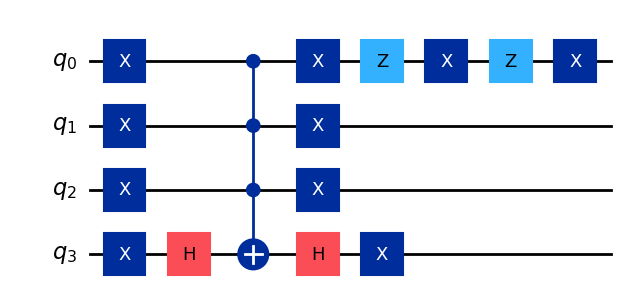

In [104]:
qcUz = qc_Uz(4)
qcUz.draw('mpl')

In [105]:
def qc_Uh(n): # 2|h><h| - I
    qc = QuantumCircuit(n, name = 'Uh')
    qc.h(list(range(n))) # transforma Uz em Uh
    qcUz = qc_Uz(n)
    qc.append(qcUz, list(range(n)))
    qc.h(list(range(n)))
    return qc

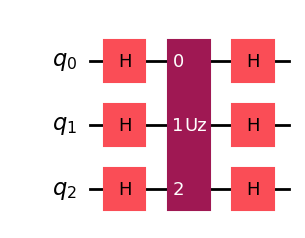

In [106]:
qcUh = qc_Uh(3)
qcUh.draw('mpl')

__Caixa preta quântica__

Para um espaço amostral com 4 dados, representados pelos índices $\{00,01,10,11\}$, e a solução sendo
$$x'=11,$$
a caixa preta quântica é obtida como segue
\begin{align}
U_f & = \sum_{x=0}^{2^2 -1}\sum_{y=0}^{2^1 -1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{y=0}^{1} \big(|0\rangle\langle 0|\otimes|y\oplus f(0)\rangle\langle y| + |1\rangle\langle 1|\otimes|y\oplus f(1)\rangle\langle y| + |2\rangle\langle 2|\otimes|y\oplus f(2)\rangle\langle y| + |3\rangle\langle 3|\otimes|y\oplus f(3)\rangle\langle y|\big) \\
& = \sum_{y=0}^{1} \big(|00\rangle\langle 00|\otimes|y\oplus f(00)\rangle\langle y| + |01\rangle\langle 01|\otimes|y\oplus f(01)\rangle\langle y| + |10\rangle\langle 10|\otimes|y\oplus f(10)\rangle\langle y| + |11\rangle\langle 11|\otimes|y\oplus f(11)\rangle\langle y|\big) \\
& = \sum_{y=0}^{1} \big(|00\rangle\langle 00|\otimes|y\oplus 0\rangle\langle y| + |01\rangle\langle 01|\otimes|y\oplus 0\rangle\langle y| + |10\rangle\langle 10|\otimes|y\oplus 0\rangle\langle y| + |11\rangle\langle 11|\otimes|y\oplus 1\rangle\langle y|\big) \\
& = |00\rangle\langle 00|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + |01\rangle\langle 01|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + |10\rangle\langle 10|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + |11\rangle\langle 11|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| \\
& = |00\rangle\langle 00|\otimes I + |01\rangle\langle 01|\otimes I + |10\rangle\langle 10|\otimes I + |11\rangle\langle 11|\otimes X \\
& = C_X^{0_1 1_1\rightarrow 2}.
\end{align}

__Exercício:__ Para um espaço amostral com 4 dados, representados pelos índices $\{00,01,10,11\}$, e a solução sendo $x'=01$, obtenha a caixa preta quântica $U_f.$

In [54]:
def qc_oracle(n):
    qc = QuantumCircuit(n+1, name = 'Oracle')
    qc.ccx(0,1,2) # para a solução sendo o estado |11>
    return qc

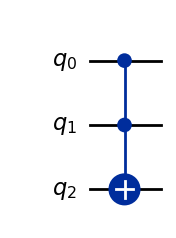

In [55]:
qco = qc_oracle(2)
qco.draw('mpl')

In [56]:
def qc_grover_iteration(n):
    qc = QuantumCircuit(n+1, name = 'G')
    qco = qc_oracle(n)
    qc.append(qco, list(range(n+1)))
    qcUh = qc_Uh(n)
    qc.append(qcUh, list(range(n)))
    return qc

In [57]:
def qc_hadamard_state(n): # aplica a Hadamard em n qubits
    qc = QuantumCircuit(n, name = 'H state') # começarei a não usar mais os qr[j]
    qc.h(list(range(n))) # aplica a hadamard em toda a lista de registros quânticos
    return qc

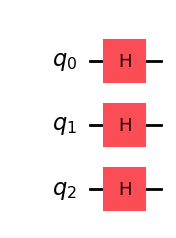

In [58]:
qchs = qc_hadamard_state(3)
qchs.draw('mpl')

In [59]:
def qc_grover_search(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n) # prepara o estado |-> no qubit auxiliar
    qchs = qc_hadamard_state(n+1) # estado de Hadamard
    qc.append(qchs, list(range(n+1)))
    qc.barrier()
    ngs = int((math.pi*math.sqrt(2**n))/4 - 1/2)
    print('Número de iterações de Grover = ', ngs)
    for j in range(0, ngs):
        qcgi = qc_grover_iteration(n)
        qc.append(qcgi, list(range(n+1)))
        qc.barrier()
    qc.measure(list(range(n)), list(range(n)))
    return qc

Número de iterações de Grover =  1


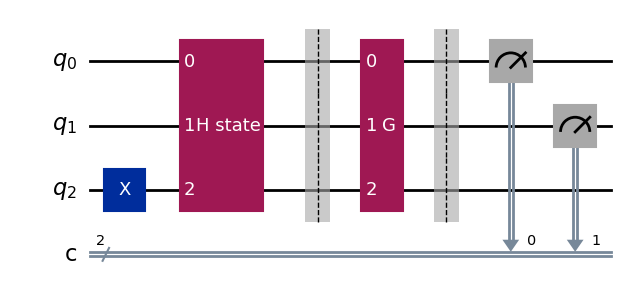

In [60]:
qcgs = qc_grover_search(2) # N=2^n = 4
qcgs.draw('mpl')

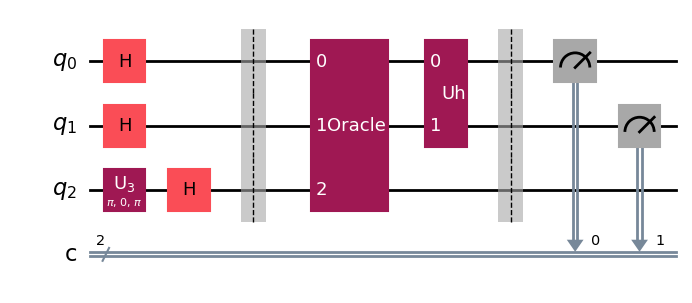

In [61]:
qcgs.decompose().draw('mpl')

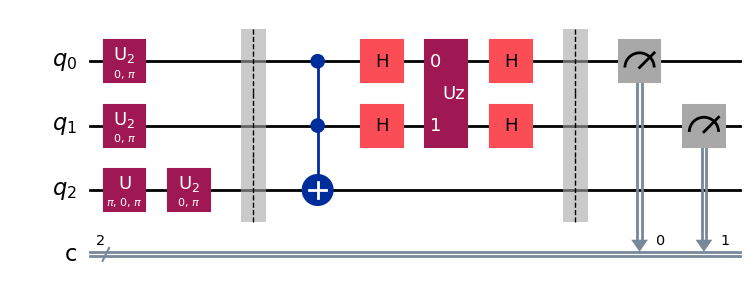

In [62]:
qcgs.decompose().decompose().draw('mpl')

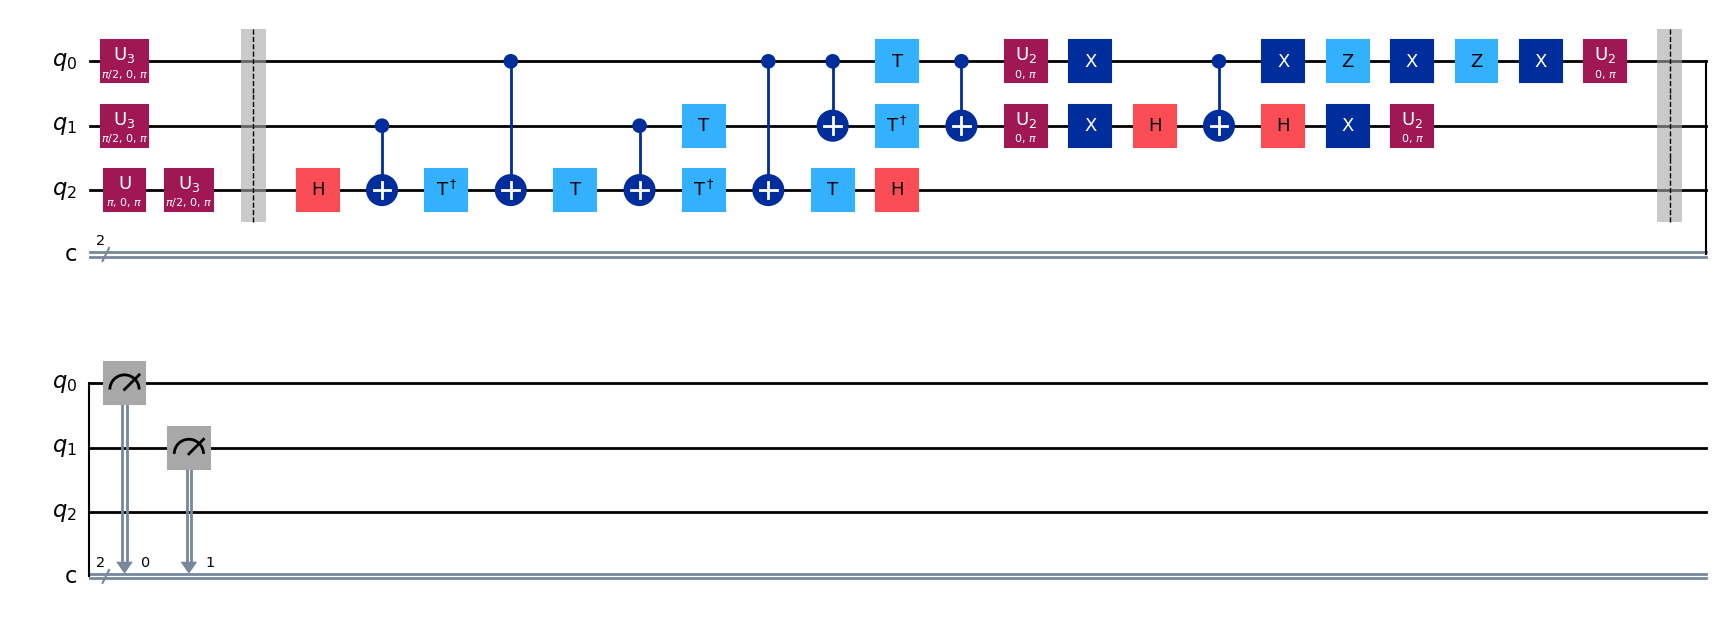

In [63]:
qcgs.decompose().decompose().decompose().draw('mpl')

### Simulação

In [64]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [65]:
qc_list = []
qcgs = qc_grover_search(2)
qc_list.append(qcgs.decompose().decompose().decompose())

Número de iterações de Grover =  1


In [66]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [67]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'11': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="7b16443765c6dfc18e138da6a445926d408b3ee87e0126b012070b18afaf9453238c715064073090fb3ecd90f4674e7f534c410924c9fae043838b229a09d122")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

csh2thavnxy0008crv0g


In [ ]:
job_id = "csh2thavnxy0008crv0g"
job = service.job(job_id)

In [ ]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'11': 3715, '10': 132, '01': 182, '00': 67}


## Gráfico

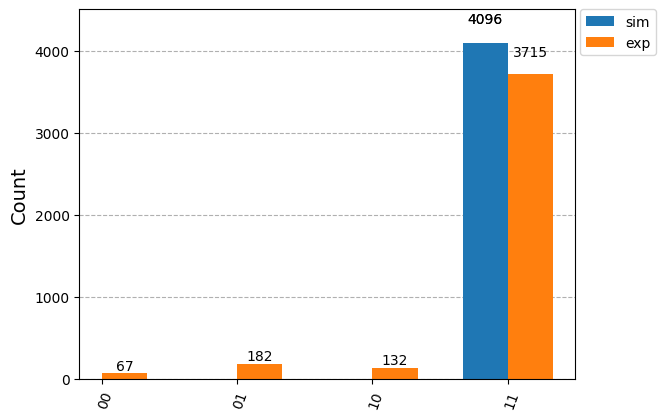

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

__Exercício:__ Faça a simulação e experimento no caso em que a solução é $01$, cuja caixa preta quântica foi obtida no exercício anterior.

### Outra implementação do oráculo

Outra forma de implementar o algoritmo de grover é usando o oráculo implementado através de $U_o$, que tem a mesma ação efetiva de $U_f$. No caso de $U_o$ não precisaremos do qubit auxiliar. Por exemplo, para a solução
$$x'=11$$
teremos que
$$U_o|00\rangle=|00\rangle,\ U_o|01\rangle=|01\rangle,\ U_o|10\rangle=|10\rangle,\ U_o|11\rangle=-|11\rangle.$$
Ou seja, temos a seguinte matriz e portas lógicas associadas:
\begin{align}
U_o(x'=11) & \doteq \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&1&0 \\ 0&0&0&-1 \end{bmatrix} = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes Z  \\
& = C_Z^{0_1\rightarrow 1}.
\end{align}

In [107]:
def qc_oracle(n):
    qc = QuantumCircuit(n, name = 'Oracle')
    qc.cz(0,1) # para a solução sendo o estado |11>
    return qc

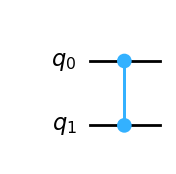

In [108]:
qco = qc_oracle(2)
qco.draw('mpl')

In [109]:
def qc_grover_iteration(n):
    qc = QuantumCircuit(n, name = 'G')
    qco = qc_oracle(n)
    qc.append(qco, list(range(n)))
    qcUh = qc_Uh(n)
    qc.append(qcUh, list(range(n)))
    return qc

In [111]:
def qc_grover_search(n):
    qc = QuantumCircuit(n,n)
    qchs = qc_hadamard_state(n) # estado de Hadamard
    qc.append(qchs, list(range(n)))
    qc.barrier()
    ngs = int((math.pi*math.sqrt(2**n))/4 - 1/2)
    print('Número de iterações de Grover = ', ngs)
    for j in range(0, ngs):
        qcgi = qc_grover_iteration(n)
        qc.append(qcgi, list(range(n)))
        qc.barrier()
    qc.measure(list(range(n)), list(range(n)))
    return qc

Número de iterações de Grover =  1


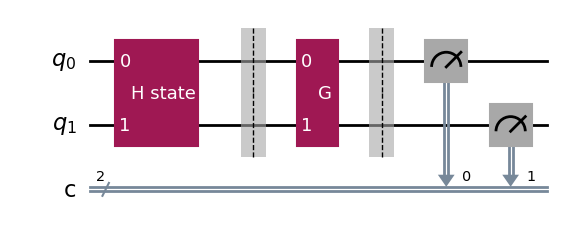

In [112]:
qcgs = qc_grover_search(2) # N=2^n = 4
qcgs.draw('mpl')

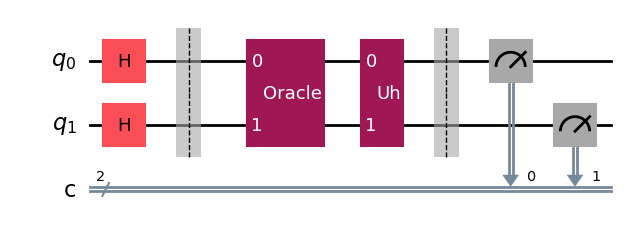

In [73]:
qcgs.decompose().draw('mpl')

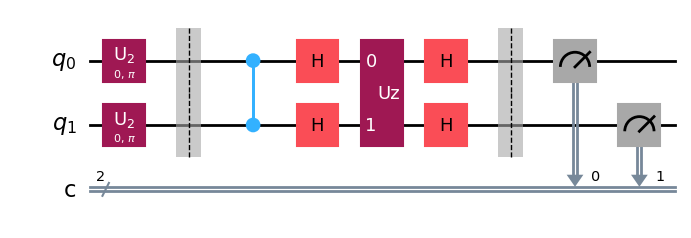

In [74]:
qcgs.decompose().decompose().draw('mpl')

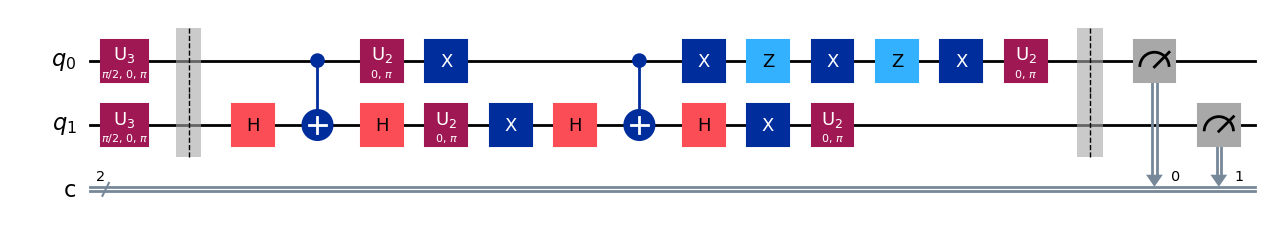

In [75]:
qcgs.decompose().decompose().decompose().draw('mpl')

### Simulação

In [113]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [114]:
qc_list = []
qcgs = qc_grover_search(2)
qc_list.append(qcgs.decompose().decompose().decompose())

Número de iterações de Grover =  1


In [115]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [116]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'11': 4096}

### Experimento

In [117]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="7b16443765c6dfc18e138da6a445926d408b3ee87e0126b012070b18afaf9453238c715064073090fb3ecd90f4674e7f534c410924c9fae043838b229a09d122")
backend = service.backend(name="ibm_osaka")

In [81]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [82]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [83]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

ct82k04cvhg0008wmmqg


In [118]:
job_id = "ct82k04cvhg0008wmmqg"
job = service.job(job_id)

In [119]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'11': 3745, '00': 27, '10': 229, '01': 95}


## Gráfico

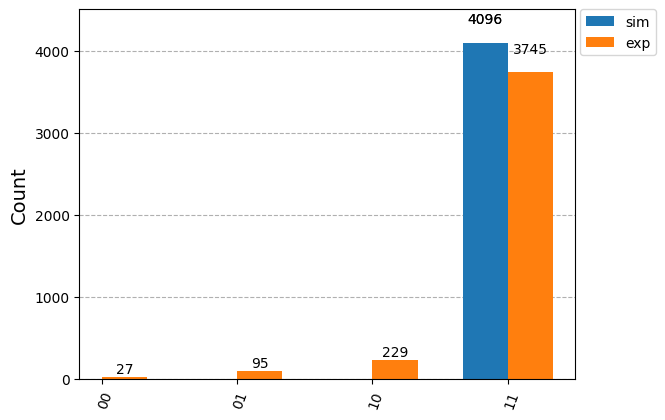

In [120]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

## Complexidade computacional

__Classicamente__ a complexidade computacional desse problema é
$$\mathcal{O}(N).$$
Como este problema é não estruturado, mesmo usando aleatoriedade, podemos encontrar o item procurado na primeira consulta ao oráculo, mas também podemos encontrar esse item na $N$-ésima consulta. Então, se procurarmos de forma determinística ou aleatória, em média usaremos
\begin{align}
& \frac{1}{N}1 + \frac{1}{N}2 + \cdots + \frac{1}{N}(N-1) + \frac{1}{N}N \\
& = \frac{1}{N}\big(1 + 2 + \cdots + (N-1) + N\big) \\
& = \frac{1}{N}\frac{N(N-1)}{2} \\
& \approx \frac{N}{2}
\end{align}
consultas ao oráculo, para $N=2^n\gg 1$. Uma busca clássica está implementada no código abaixo.

Como vimos acima, o número de consultas ao oráculo no caso __quântico__ é
$$\mathcal{O}\big(\sqrt{N}\big).$$
Temos portanto um _ganho quadrático_ do algoritmo quântico em relação ao algoritmo clássico.

In [ ]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [ ]:
def my_oracle(my_input):
    solution = 2
    if my_input == solution:
        response = True
    else:
        response = False
    return response

In [ ]:
my_input = 7
res = my_oracle(my_input)
print(res)

False


In [ ]:
def classical_search(my_list):
  for j in range(0,len(my_list)):
      if my_oracle(my_list[j]) == True:
          print('Solução encontrada no índice',j, ', após ', j+1, ' consultas ao oráculo.')
          return

classical_search(my_list)

Solução encontrada no índice 3 , após  4  consultas ao oráculo.


# Algoritmo de Grover para mais de uma solução

Consideremos uma função
$$f:\{0,1\}^n\rightarrow \{0,1\}.$$
O domínio dessa função contém
$$N=2^n$$
amostras, das quais $M$ são as soluções esperadas. Ou seja
\begin{cases}
f(x)=1 \text{ para as } M \text{ soluções}, \\
f(x)=0 \text{ para os outros } N-M \text{ valores de } x.
\end{cases}

Vamos denotar o conjunto de soluções por
$$S = \{x\in\{0,1\}^n|f(x)=1\}.$$
Podemos definir um estado particular (máxima superposição) no subespaço gerado pelos estados solução, o _subespaço solução_, como segue:
$$|x'\rangle = \frac{1}{\sqrt{M}}\sum_{x\in S}|x\rangle.$$
Já um estado particular (máxima superposição) no _subespaço ortogonal_ ao subespaço solução pode ser escrito como segue:
$$|x'_\perp\rangle = \frac{1}{\sqrt{N-M}}\sum_{x\notin S}|x\rangle.$$

Tendo essas definições, o resto do algoritmo de Grover segue os mesmos passos do caso com uma única solução. Primeiramente preparamos o estado de Hadamard:
\begin{align}
|h\rangle & = H^{\otimes n}|0\rangle^{\otimes n}  = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle \\
& = \frac{1}{\sqrt{N}}\sum_{x\in S}|x\rangle + \frac{1}{\sqrt{N}}\sum_{x\notin S}|x\rangle \\
& = \sqrt{\frac{M}{N}}\frac{1}{\sqrt{M}}\sum_{x\in S}|x\rangle + \sqrt{\frac{N-M}{N}}\frac{1}{\sqrt{N-M}}\sum_{x\notin S}|x\rangle \\
& = \sqrt{\frac{M}{N}}|x'\rangle + \sqrt{\frac{N-M}{N}}|x'_\perp\rangle \\
& =:  \sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle,
\end{align}
em que definimos
\begin{align}
& \sin\theta := \sqrt{\frac{M}{N}}\ \therefore\ \theta = \arcsin\sqrt{\frac{M}{N}}, \\
& \cos\theta = \sqrt{\frac{N-M}{N}}\ \therefore\ \theta = \arccos\sqrt{\frac{N-M}{N}}.
\end{align}

Quanto ao oráculo,
$$U_f|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle\ \therefore\ U_f|x\rangle|-\rangle = (-1)^{f(x)}|x\rangle|-\rangle,$$
teremos que
\begin{cases}
x\in S\ \therefore\ U_f|x\rangle|-\rangle = -|x\rangle|-\rangle, \\
x\notin S\ \therefore\ U_f|x\rangle|-\rangle = |x\rangle|-\rangle.
\end{cases}

Vamos definir um projetor no subespaço solução:
$$P_{x'} := \sum_{x\in S}|x\rangle\langle x|$$
e vamos definir o reflector em relação ao subespaço ortogonal ao espaço solução como
$$U_o := I - 2P_{x'}.$$
Como
\begin{cases}
x\in S\ \therefore\ P_{x'}|x\rangle = \sum_{y\in S}|y\rangle\langle y|x\rangle = \sum_{y\in S}|y\rangle\delta_{y,x} = |x\rangle, \\
x\notin S\ \therefore\ P_{x'}|x\rangle = \sum_{y\notin S}|y\rangle\langle y|x\rangle = \sum_{y\in S}|y\rangle 0 = |\oslash\rangle.
\end{cases}
a ação desse operador é a seguinte
\begin{cases}
x\in S\ \therefore\ U_o|x\rangle = I|x\rangle - 2P_{x'}|x\rangle = |x\rangle - 2|x\rangle = - |x\rangle, \\
x\notin S\ \therefore\ U_o|x\rangle = I|x\rangle - 2P_{x'}|x\rangle = |x\rangle - 2|\oslash\rangle = |x\rangle,
\end{cases}
que por conseguinte implementa efetivamente a ação de $U_f$.
Segue assim que
$$U_o|h\rangle = \sin(-\theta)|x'\rangle + \cos(-\theta)|x'_\perp\rangle.$$
Ou seja, aqui também $U_o$ causa um reflexão do estado em relação a $|x'_\perp\rangle$ no sentido horário do plano $(|x'\rangle,|x'_\perp\rangle).$

Seguindo, definimos o reflector em relação ao estado de Hadamard no sentido anti-horário do plano $(|x'\rangle,|x'_\perp\rangle)$ ou do plano $(|h\rangle,|h_\perp\rangle)$:
$$U_h = 2|h\rangle\langle h| - I.$$
Como $U_h|h\rangle = |h\rangle,\ U_h|h_\perp\rangle = -|h_\perp\rangle$, teremos que
\begin{align}
G|h\rangle & = U_h U_o|h\rangle \\
& = \sin(3\theta)|x'\rangle + \cos(3\theta)|x'_\perp\rangle.
\end{align}
Novamente vemos que iniciamos no estado $|h\rangle$ que está distante de uma ângulo $\pi/2-\theta$ do subespaço solução, e aplicando a iteração de Grover $G$ chegamos mais perto desse subespaço, diminuindo a distância para $\pi/2 -3\theta.$

Após $j$ iterações de Grover, teremos obtido o estado
$$|g_j\rangle = \sin((2j+1)\theta)|x'\rangle + \cos((2j+1)\theta)|x'_\perp\rangle.$$
Para que este estado seja um estado do subespaço solução, devemos ter
$$|g_j\rangle = |x'\rangle,$$
e para isso devemos ter
$$(2j+1)\theta=\frac{\pi}{2}\ \therefore\ j=\frac{\pi}{4\theta} - \frac{1}{2}.$$
Como
$$\sin\theta = \sqrt{\frac{M}{N}} \ge 0,\ \cos\theta = \sqrt{\frac{N-M}{N}} \ge 0,$$
devemos ter
$$\theta \in [0,\pi/2].$$
Nesse intervalo temos que
$$\theta\ge\sin\theta.$$
Com isso, vem que
\begin{align}
j & = \frac{\pi}{4\theta} - \frac{1}{2} \\
& \le \frac{\pi}{4\sin\theta} - \frac{1}{2} \\
& = \frac{\pi}{4}\sqrt{\frac{N}{M}} - \frac{1}{2}.
\end{align}

A complexidade computacional do algoritmo quântico de Grover neste caso é
$$CC_Q = \mathcal{O}\Big(\sqrt{\frac{N}{M}}\Big).$$
Ou seja, a existência de mais soluções faz com que o algoritmo e Grover as encontre mais rápido.

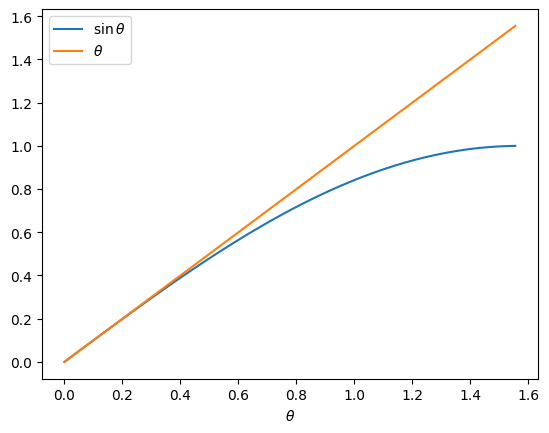

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
th = np.arange(0,math.pi/2,(math.pi/2)/100)
y1 = np.sin(th)
y2 = th
plt.plot(th,y1,label=r'$\sin\theta$')
plt.plot(th,y2,label=r'$\theta$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

### Exemplo:

Vamos considerar um banco de dados representado por $\{0,1\}^3$ com as soluções procuradas sendo
$$x'=101,\ 111.$$
O oráculo pode ser implementado usando o operador $U_o$ representado na base $\{|000\rangle,|001\rangle,|010\rangle,|011\rangle,|100\rangle,|101\rangle,|110\rangle,|111\rangle\}$ com segue:
\begin{align}
U_o & \doteq \begin{bmatrix}1&0&0&0&0&0&0&0 \\ 0&1&0&0&0&0&0&0 \\ 0&0&1&0&0&0&0&0 \\ 0&0&0&1&0&0&0&0 \\ 0&0&0&0&1&0&0&0 \\ 0&0&0&0&0&-1&0&0 \\ 0&0&0&0&0&0&1&0 \\ 0&0&0&0&0&0&0&-1 \\\end{bmatrix} \\
& = |0\rangle\langle 0|\otimes I\otimes I + |1\rangle\langle 1|\otimes I\otimes Z \\
& \equiv C_Z^{0_1\rightarrow 2}.
\end{align}

In [131]:
def qc_oracle(n):
    qc = QuantumCircuit(n, name = 'Oracle')
    # Para as soluções sendo os estados |101> e |111>
    qc.cz(0,2)
    return qc

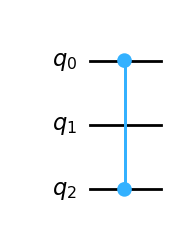

In [132]:
qco = qc_oracle(3)
qco.draw('mpl')

In [133]:
def qc_grover_search(N,M):
    n = int(math.log(N,2))
    qc = QuantumCircuit(n, n)
    qchs = qc_hadamard_state(n) # estado de Hadamard
    qc.append(qchs, list(range(n)))
    qc.barrier()
    ngs = int((math.pi*math.sqrt(N/M))/4 - 1/2)
    print('Número de iterações de Grover = ', ngs)
    for j in range(0, ngs):
        qcgi = qc_grover_iteration(n)
        qc.append(qcgi, list(range(n)))
        qc.barrier()
    qc.measure(list(range(n)), list(range(n)))
    return qc

Número de iterações de Grover =  1


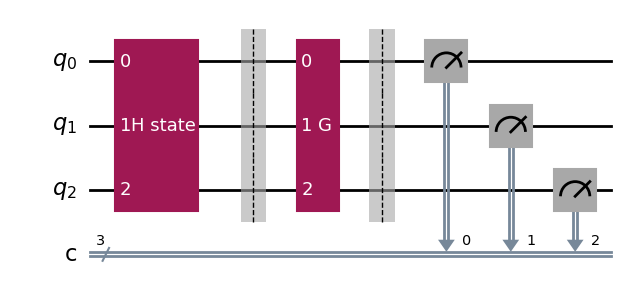

In [134]:
N = 8; M = 2
qcgs = qc_grover_search(N,M)
qcgs.draw('mpl')

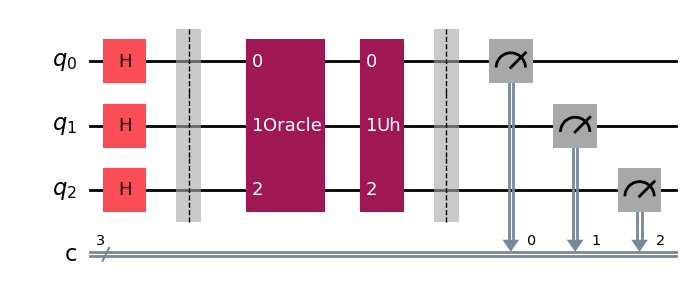

In [135]:
qcgs.decompose().draw('mpl')

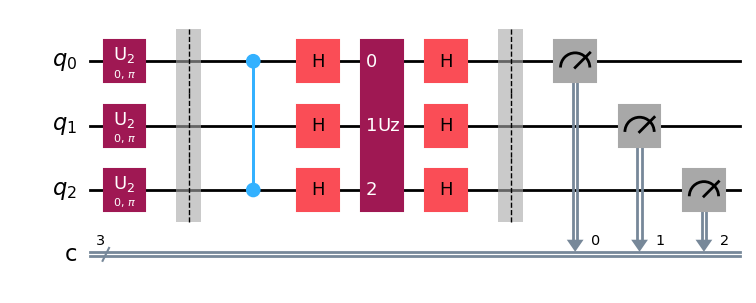

In [136]:
qcgs.decompose().decompose().draw('mpl')

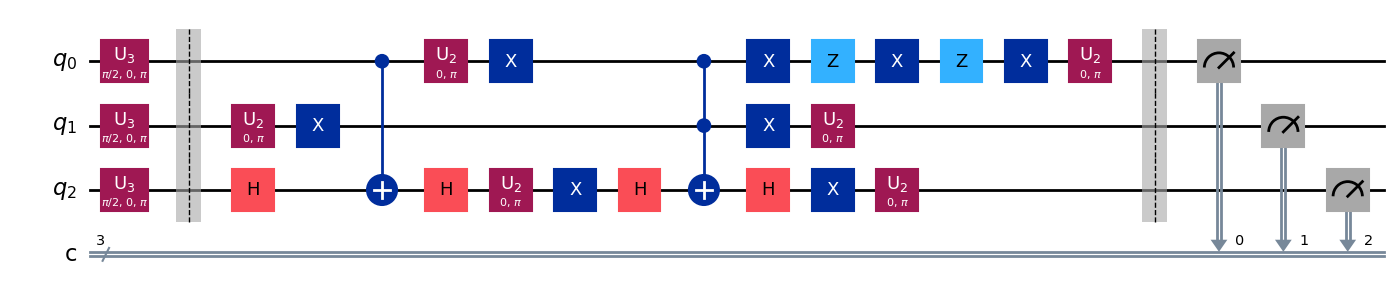

In [137]:
qcgs.decompose().decompose().decompose().draw('mpl')

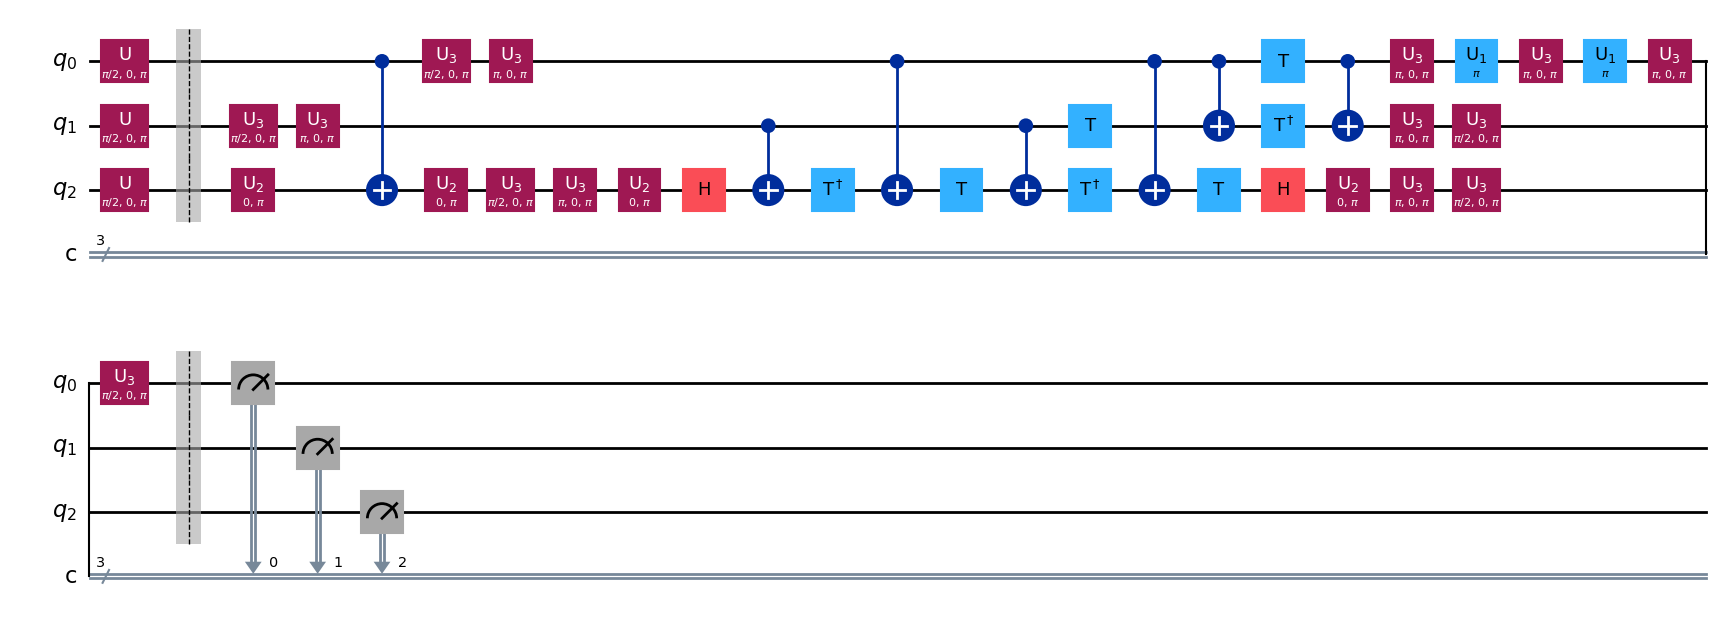

In [138]:
qcgs.decompose().decompose().decompose().decompose().draw('mpl')

### Simulação

In [139]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [140]:
qc_list = []
qcgs = qc_grover_search(N,M)
qc_list.append(qcgs.decompose().decompose().decompose())

Número de iterações de Grover =  1


In [141]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [142]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'111': 2032, '101': 2064}

### Experimento

In [144]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="7b16443765c6dfc18e138da6a445926d408b3ee87e0126b012070b18afaf9453238c715064073090fb3ecd90f4674e7f534c410924c9fae043838b229a09d122")
backend = service.backend(name="ibm_osaka")

In [145]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [147]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [148]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

ct83g4rqsez0008a0g80


In [149]:
job_id = "ct83g4rqsez0008a0g80"
job = service.job(job_id)

In [150]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'101': 1620, '111': 1525, '000': 64, '100': 246, '011': 201, '110': 223, '001': 164, '010': 53}


## Gráfico

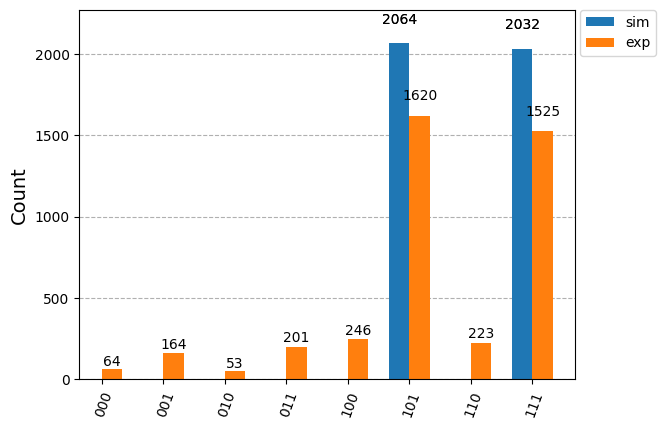

In [152]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

__Exercício:__ Obtenha $U_f$, faça a simulação e experimento no caso em que as soluções são $01$ e $10$.

## O algoritmo de Grover é o mais eficiente

ddddd

## Referências

1. L. K. Grover, “A fast quantum mechanical algorithm for database search,” in Proceedings of the twenty-eighth annual ACM symposium on Theory of Computing, in STOC'96. New York, NY, USA: Association for Computing Machinery, Jul. 1996, pp. 212-219. doi: 10.1145/237814.237866.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. R. Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. D. Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.